 # General Recap
 
 Today's aim is to conduct a full analysis of the Titanic dataset, from df upload to linear regression.

## 1. Importo librerías y dataset

In [3]:
# manejo bbdd
import pandas as pd
import numpy as np
import datetime

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#modelos y evaluación
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
df = pd.read_csv("Data/titanic.csv")

## 2. Initial exploration of the data

- datatypes
- Nulls (check, do not work on them yet)
- columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
521,522,0,3,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Categorical Data - Exploration

### Activity

Analizar los distintos campos categóricos. Definir tratamientos a realizar:

- Corrección de categorías: value_counts? gráficas?
- Hay algún campo que deba eliminarse por cantidad de nulos? Se podría hacer algo para evitarlo?
- Hay algún campo que deba eliminarse ya que no aporta información?

### Solución

In [11]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
df.Ticket.value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [13]:
df = df.drop(columns="Ticket")

In [14]:
df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [15]:
df = df.drop(columns="Cabin")

In [16]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
# PENDIENTE IMPUTAR VACIOS DE EMBARKED

Variables a analizar:
- Name -> resolvemos por feature extraction
- Sex -> ok
- Ticket -> drop
- Cabin -> podríamos hacer extraction, habría que investigar más
- Embarked -> ok

### Feature extraction
- Hay algún campo que se pueda utilizar para feature extraction?

In [20]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,61.1750,S
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,59.4000,C
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,7.8958,S
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,40.1250,C
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,69.5500,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,83.4750,S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,30.6958,C
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,113.2750,C
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,10.5000,S
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,6.7500,Q


In [21]:
df["title"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [22]:
df["title"].value_counts()

title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [23]:
df["title"].value_counts()[4:]

title
Dr              7
Rev             6
Mlle            2
Major           2
Col             2
the Countess    1
Capt            1
Ms              1
Sir             1
Lady            1
Mme             1
Don             1
Jonkheer        1
Name: count, dtype: int64

In [24]:
df["title"].replace("Mlle", "Mrs", inplace=True)
df["title"].replace("Ms", "Miss", inplace=True)
df["title"].replace("Mme", "Miss", inplace=True)
df["title"].replace("Don", "Mr", inplace=True)

In [25]:
df["title"].replace(df["title"].value_counts().index[4:], "Other", inplace=True)

In [26]:
df["title"].value_counts()

title
Mr        518
Miss      184
Mrs       127
Master     40
Other      22
Name: count, dtype: int64

In [27]:
df = df.drop(['Name'], axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,Other
887,888,1,1,female,19.0,0,0,30.0000,S,Miss
888,889,0,3,female,NaN,1,2,23.4500,S,Miss
889,890,1,1,male,26.0,0,0,30.0000,C,Mr


## 4. Numerical Data - Exploration

### Activity

Para las distintas variables numéricas
- Explorar nulls
- Explorar outliers
- Hay alguna variable a la que haya que aplicarle transformaciones (log, raiz cuadrada)?
- Explorar correlaciones entre variables numéricas

In [30]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,Other
887,888,1,1,female,19.0,0,0,30.0000,S,Miss
888,889,0,3,female,NaN,1,2,23.4500,S,Miss
889,890,1,1,male,26.0,0,0,30.0000,C,Mr


### Solución

Variables a analizar:
- PClass -> ok
- Survived -> ok
- Age -> IMPUTAR NULOS
- SibSp -> ok
- Parch -> ok
- Fare

In [32]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [33]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [34]:
df.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [35]:
df.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

### Transformaciones

/Users/sabi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


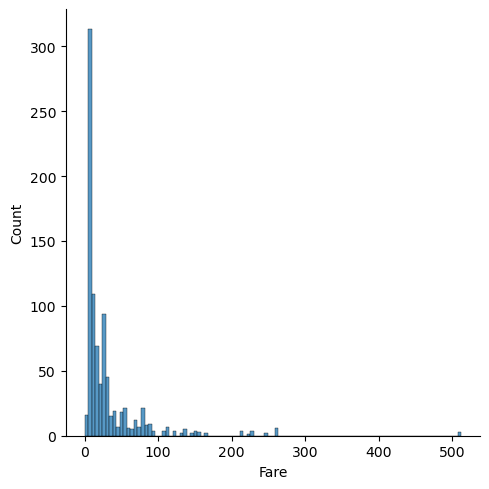

In [167]:
sns.displot(df.Fare)
plt.show()

In [163]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

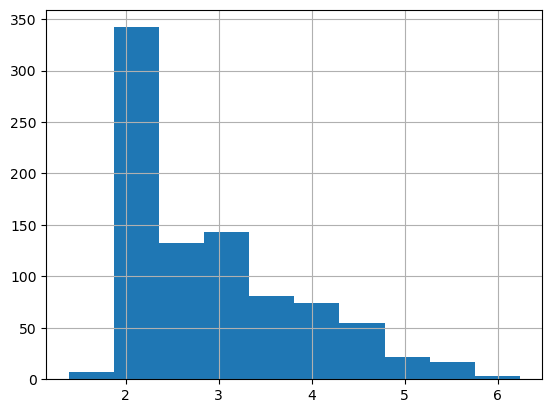

In [175]:
pd.Series(map(log_transfom_clean_, df.Fare)).hist()
plt.show()

In [165]:
def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN

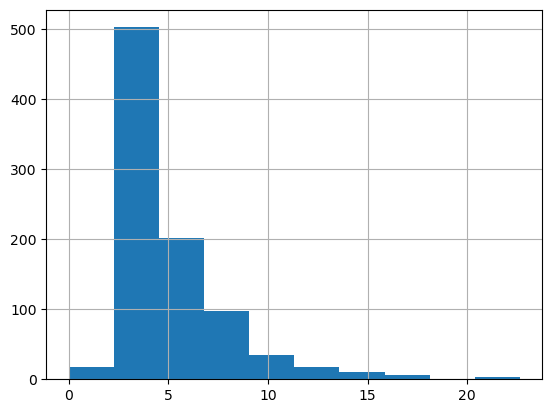

In [173]:
pd.Series(map(sqrt_transfom_clean_, df.Fare)).hist()
plt.show()

### Null Imputation

We only have the Age column with nulls... Let's fill them in, but exploring the data... are men the same age on average as women?

To adjust a little more, we are going to fill the NaN of the age with the median but based on some categories (gender, PClass and Title)

In [41]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

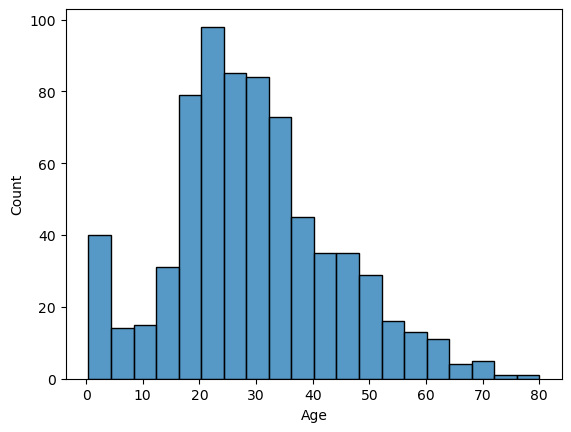

In [42]:
import seaborn as sns
sns.histplot(df.Age);

In [43]:
df.Age.isna().sum()

177

In [44]:
serie_hombres = df[df["Sex"]=="male"]["Age"]
serie_hombres

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: Age, Length: 577, dtype: float64

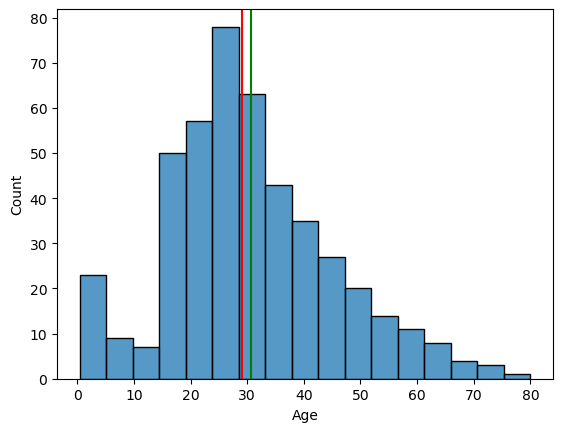

In [45]:
sns.histplot(serie_hombres)
plt.axvline(serie_hombres.median(), c="r", label="median")
plt.axvline(serie_hombres.mean(), c="g", label="mean");

'\nHombres: más distribuido; max es más alto\nHombres: más outliers\nLa mediaNA y el máximo de mujer es más joven\nAncho de las cajas: rango\nAncho respecto a la línea: simetría\n'

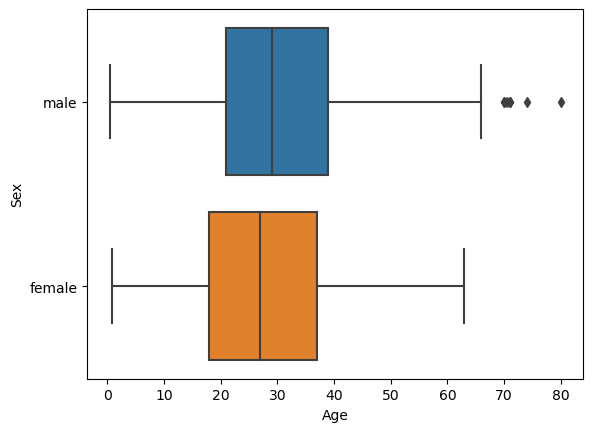

In [46]:
sns.boxplot(x=df.Age, y=df.Sex);

"""
Hombres: más distribuido; max es más alto
Hombres: más outliers
La mediaNA y el máximo de mujer es más joven
Ancho de las cajas: rango
Ancho respecto a la línea: simetría
"""

In [47]:
df.groupby(["Pclass", "Sex"]).agg({"Age":"mean"})

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [48]:
df["age"] = df.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.mean()))

In [49]:
df["age"]

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    21.75
889    26.00
890    32.00
Name: age, Length: 891, dtype: float64

In [50]:
df.age.isna().sum()

0

In [51]:
df.drop(columns = ["Age"], inplace=True)

In [52]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       2
title          0
age            0
dtype: int64

### Correlaciones

In [53]:
df.Embarked = df.Embarked.fillna(df["Embarked"].mode()[0])

In [54]:
# Feature generation
df["adult"] = df.age.apply(lambda x: 1 if x > 16 else 0)

In [55]:
df.drop(columns = ["title"], inplace=True)

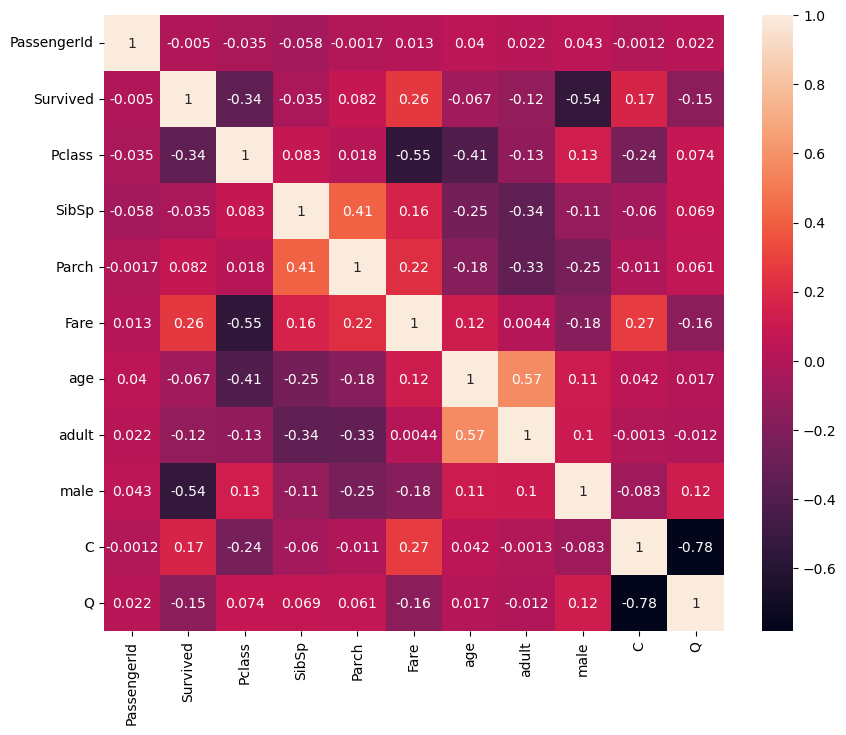

In [177]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

data_corr = df.select_dtypes(np.number)
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

## 5. Categorical Encoding

### Label Encoder
Pros and cons
- If we have categories that have value in themselves, such as "good, bad, regular" the ideal would be not to let LabelEncoder do it automatically but to apply it manually, since the value we put can influence the weight that the algorithm gives those variables.

In [59]:
df.sample()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,age,adult
229,230,0,3,female,3,1,25.4667,S,21.75,1


In [60]:
df[["female", "male"]] = pd.get_dummies(df["Sex"], dtype="int")
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,age,adult,female,male
0,1,0,3,male,1,0,7.2500,S,22.00,1,0,1
1,2,1,1,female,1,0,71.2833,C,38.00,1,1,0
2,3,1,3,female,0,0,7.9250,S,26.00,1,1,0
3,4,1,1,female,1,0,53.1000,S,35.00,1,1,0
4,5,0,3,male,0,0,8.0500,S,35.00,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S,27.00,1,0,1
887,888,1,1,female,0,0,30.0000,S,19.00,1,1,0
888,889,0,3,female,1,2,23.4500,S,21.75,1,1,0
889,890,1,1,male,0,0,30.0000,C,26.00,1,0,1


In [61]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [62]:
df["sexo"] = le.fit_transform(df["Sex"])
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,age,adult,female,male,sexo
0,1,0,3,male,1,0,7.2500,S,22.00,1,0,1,1
1,2,1,1,female,1,0,71.2833,C,38.00,1,1,0,0
2,3,1,3,female,0,0,7.9250,S,26.00,1,1,0,0
3,4,1,1,female,1,0,53.1000,S,35.00,1,1,0,0
4,5,0,3,male,0,0,8.0500,S,35.00,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S,27.00,1,0,1,1
887,888,1,1,female,0,0,30.0000,S,19.00,1,1,0,0
888,889,0,3,female,1,2,23.4500,S,21.75,1,1,0,0
889,890,1,1,male,0,0,30.0000,C,26.00,1,0,1,1


In [63]:
df.drop(columns=["female","Sex","sexo"], inplace=True)

In [182]:
df[["C", "Q", "S"]] = pd.get_dummies(df.Embarked, dtype="int")

AttributeError: 'DataFrame' object has no attribute 'Embarked'

In [65]:
df

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,age,adult,male,C,S,Q
0,1,0,3,1,0,7.2500,S,22.00,1,1,0,0,1
1,2,1,1,1,0,71.2833,C,38.00,1,0,1,0,0
2,3,1,3,0,0,7.9250,S,26.00,1,0,0,0,1
3,4,1,1,1,0,53.1000,S,35.00,1,0,0,0,1
4,5,0,3,0,0,8.0500,S,35.00,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,S,27.00,1,1,0,0,1
887,888,1,1,0,0,30.0000,S,19.00,1,0,0,0,1
888,889,0,3,1,2,23.4500,S,21.75,1,0,0,0,1
889,890,1,1,0,0,30.0000,C,26.00,1,1,1,0,0


In [66]:
df.drop(columns=["Embarked","S"], inplace=True)

In [67]:
df

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,age,adult,male,C,Q
0,1,0,3,1,0,7.2500,22.00,1,1,0,1
1,2,1,1,1,0,71.2833,38.00,1,0,1,0
2,3,1,3,0,0,7.9250,26.00,1,0,0,1
3,4,1,1,1,0,53.1000,35.00,1,0,0,1
4,5,0,3,0,0,8.0500,35.00,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,27.00,1,1,0,1
887,888,1,1,0,0,30.0000,19.00,1,0,0,1
888,889,0,3,1,2,23.4500,21.75,1,0,0,1
889,890,1,1,0,0,30.0000,26.00,1,1,1,0


## 6. Numerical Features Scaling

Some algorithms, especially those based on distance calculations, will give more weight to features that show large changes in value, interpreting these features as artificially more important. For these algorithms, it is important that we scale our features, or that we scale features with naturally different scales, so that the features are used by the algorithm without artificial overweighting, and allow two features with different scales to be compared.

In [70]:
df

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,age,adult,male,C,Q
0,1,0,3,1,0,7.2500,22.00,1,1,0,1
1,2,1,1,1,0,71.2833,38.00,1,0,1,0
2,3,1,3,0,0,7.9250,26.00,1,0,0,1
3,4,1,1,1,0,53.1000,35.00,1,0,0,1
4,5,0,3,0,0,8.0500,35.00,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,27.00,1,1,0,1
887,888,1,1,0,0,30.0000,19.00,1,0,0,1
888,889,0,3,1,2,23.4500,21.75,1,0,0,1
889,890,1,1,0,0,30.0000,26.00,1,1,1,0


### Activity
Review numerical features:
- Explore and deal with outliers
- Research how to standarize or normalize the columns

## 7. Train-Test Split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
df.sample()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,age,adult,male,C,Q
248,249,1,1,1,1,52.5542,37.0,1,1,0,1


In [75]:
X = df.drop(columns = "Fare")
y = df.Fare

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [77]:
X_train.shape

(668, 10)

In [78]:
X_test.shape

(223, 10)

In [79]:
y_train.shape

(668,)

In [80]:
y_test.shape

(223,)

## 8. Apply model

### Activity

Aplicar un modelo de regresión lineal para evaluar que variables son mejores predictoras del precio (Fare).
Testear luego la capacidad de predicción de este modelo con la porción de test.

### usando StatsModels

In [84]:
X_train_sm = sm.add_constant(X)

model = sm.OLS(y,X_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     58.94
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           4.52e-91
Time:                        13:16:29   Log-Likelihood:                -4515.5
No. Observations:                 891   AIC:                             9053.
Df Residuals:                     880   BIC:                             9106.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          95.8511     10.226      9.373      

In [85]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
print("R2 value is = ",round(lm.score(X_train,y_train),2))

R2 value is =  0.39


In [86]:
predictions=lm.predict(X_test)
predictions

array([ 7.30698133e+01,  6.72346607e+01,  3.83369772e+01,  2.97227000e+00,
        6.28671789e+01,  5.82299188e+01,  3.56914578e+01, -9.59623636e+00,
       -2.66581767e+00,  4.33681688e+01,  3.09527831e+01,  7.67034572e+01,
        7.88178721e+01,  7.48579204e+01,  2.84301540e+01, -1.22020307e+00,
       -7.69648241e-01,  9.17388556e+00,  2.93444274e+01, -1.23539704e+00,
        6.30986390e+01,  9.43201408e+00,  2.71021036e+01,  4.97340639e+01,
       -2.30573960e+00,  7.66037166e+01,  2.14511009e+01, -1.82597573e+00,
       -4.03287136e+00,  9.02991001e+00,  2.88602264e-01,  1.33451772e+01,
        3.55020617e+01,  9.44935256e+01, -2.33041554e+00, -3.77230428e+00,
        5.65443725e+01,  2.76155812e+01,  4.70599904e+01,  9.64374640e+00,
        6.79734343e+01,  5.36690281e+01, -5.12795298e+00,  2.39034095e+00,
        7.59734618e+01,  6.94856036e+01,  6.85967753e+01, -9.70845527e+00,
        3.73801150e+01,  7.13674737e+00,  2.02992815e+01, -2.11664730e+00,
        1.56739539e+01,  

In [87]:
mse=mean_squared_error(y_test, predictions)
print(mse)

rmse=math.sqrt(mse)
print(rmse)

r2=r2_score(y_test, predictions)
print(r2)

1690.6769621546832
41.11784238204484
0.40955794436617377
